In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
colnames=['preg','glu','bp','sft','ins','bmi','dpf','age','outcome']

In [4]:
prima_df = pd.read_csv("pima-indians-diabetes-1.data",names=colnames)
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
prima_df.columns

Index(['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome'], dtype='object')

In [7]:
prima_df.shape

(768, 9)

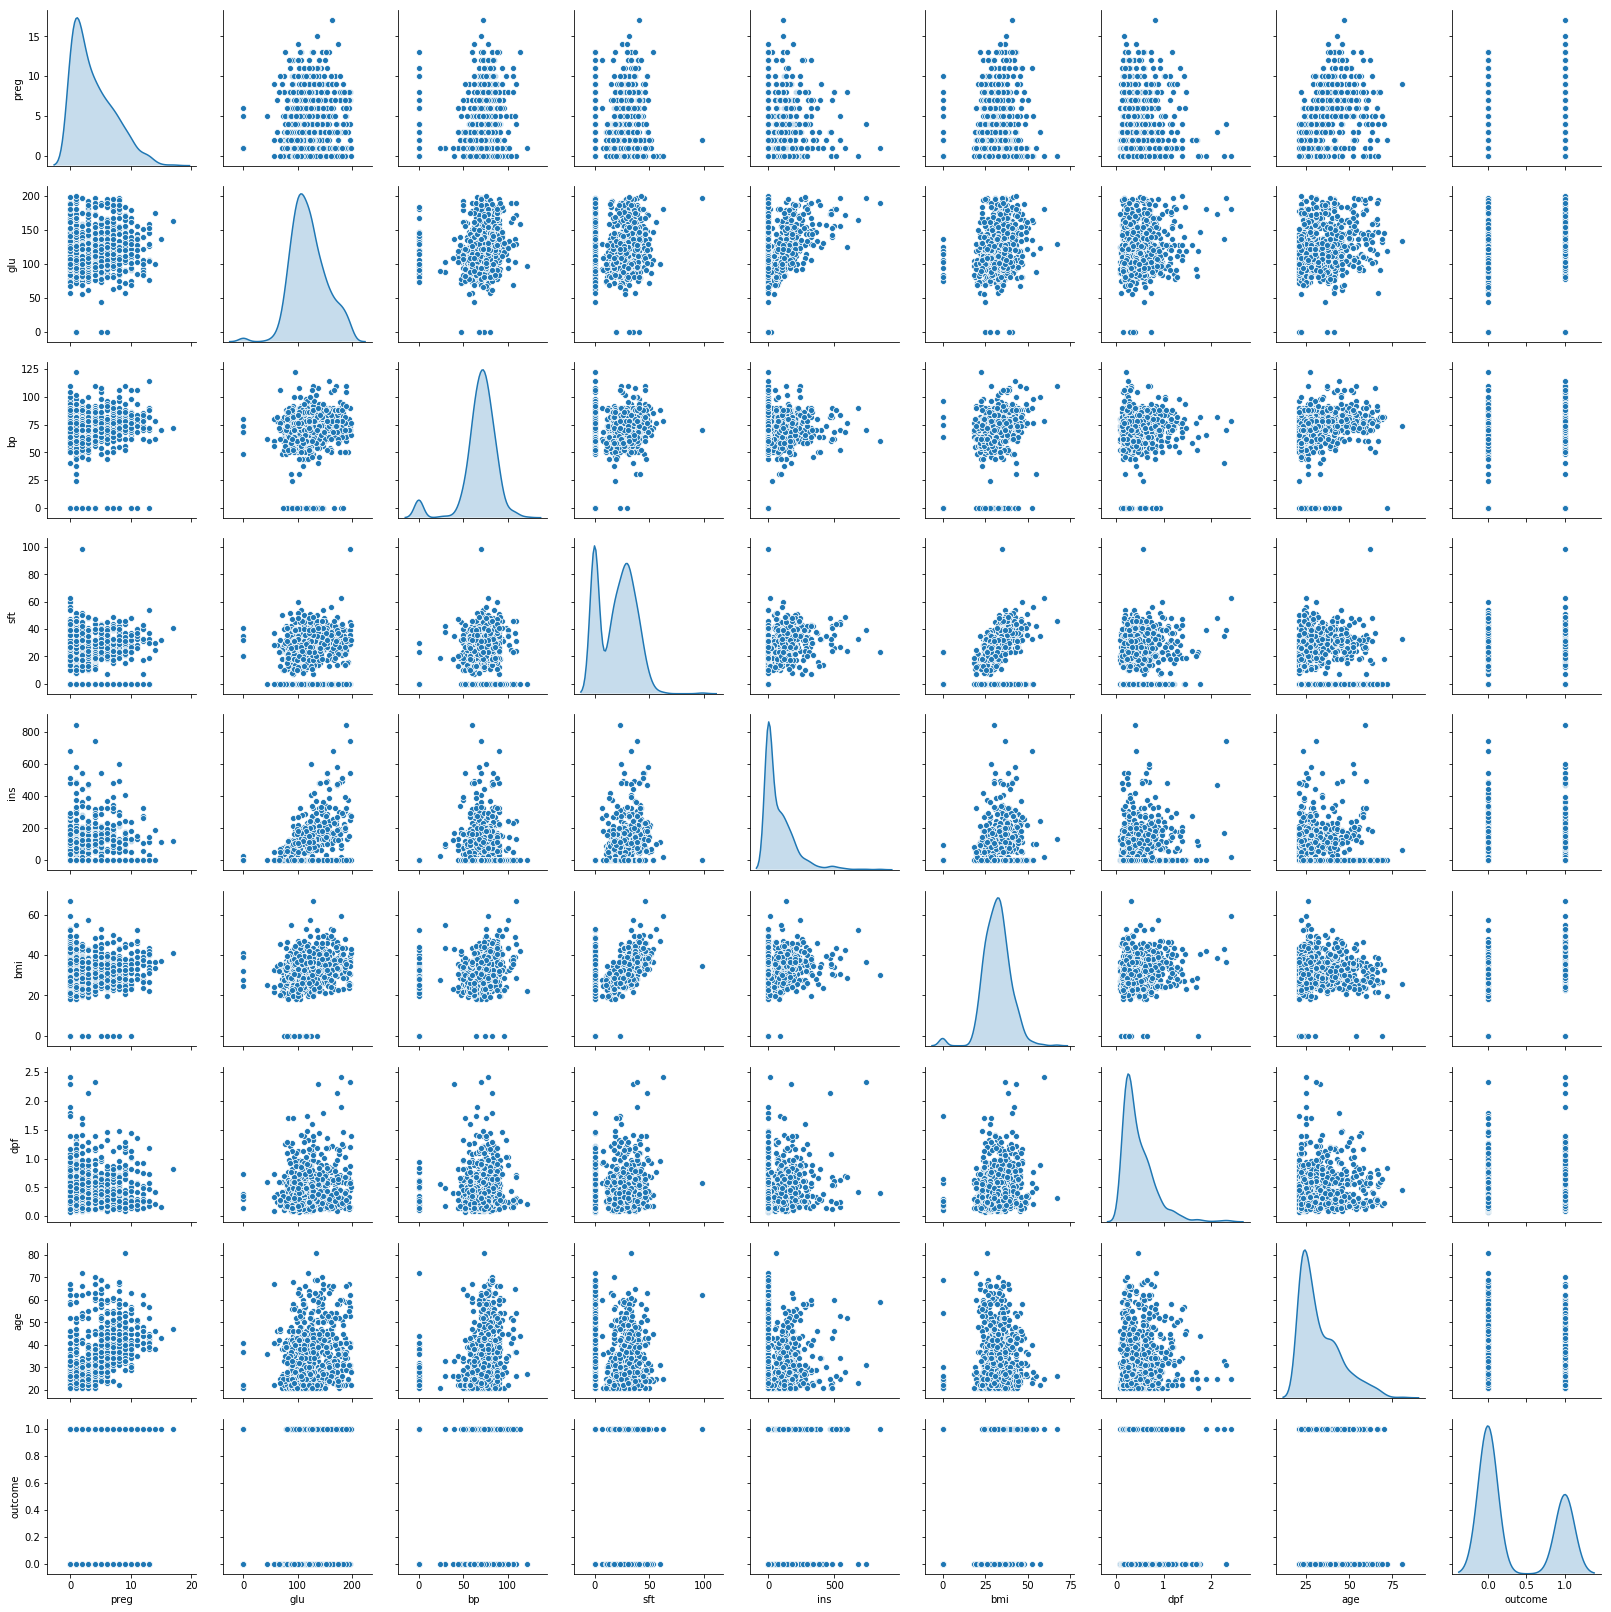

In [8]:
import seaborn as sns
sns.pairplot(prima_df,diag_kind='kde')

In [9]:
prima_df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [10]:
X = prima_df[['preg','glu','bp','sft','ins','bmi','dpf','age']]
Y = prima_df['outcome']

# Standardization

In [11]:
X_std = StandardScaler().fit_transform(X)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
X.head()

,preg,glu,bp,sft,ins,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_std,Y,test_size=0.3,random_state=2)

In [14]:
X_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Naive Bayes Model

In [15]:
model = GaussianNB()

In [16]:
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

# Accuracy 

In [18]:
acc = metrics.accuracy_score(ytest,ypred)
print(acc)

0.7705627705627706


In [19]:
cm = metrics.confusion_matrix(ytest,ypred)
print(cm)

[[136  19]
 [ 34  42]]


In [20]:
cr = metrics.classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       155
           1       0.69      0.55      0.61        76

   micro avg       0.77      0.77      0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



# Comparision of all the Models

In [21]:
Dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4)
RF_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=4)
#Nb_model = GaussianNB()
#Lr_model=LogisticRegression()

In [22]:
models = []
models.append(('DecisionTree',Dt_model))
models.append(('RandomForest',RF_model))
#models.append(('GaussianNB',Nb_model))
#models.append(('LogisticRegression',Lr_model))

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X_std,Y,test_size=0.3,random_state=2)

In [24]:
X_std = StandardScaler().fit_transform(X)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


DecisionTree:0.740858(0.079030)
RandomForest:0.773377(0.068759)


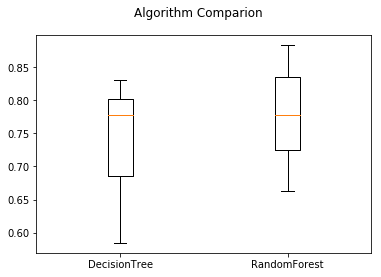

In [25]:
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=2)
    cv_results = model_selection.cross_val_score(model,X_std,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparion')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Using Grid Search to Find the Accurate Depth Parameter

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
#Perform Grid Search Method to find the optimal max_depth size

In [28]:
params = {'max_depth':np.arange(1,11)}
GS = GridSearchCV(model,params,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
Dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0)
RF_model = RandomForestClassifier(n_estimators=50,criterion='entropy')
param_dt = {'max_depth':np.arange(1,11)}
param_rf = {'max_depth':np.arange(1,11),'n_estimators':np.arange(1,100)}

Gs_dt=GridSearchCV(Dt_model,param_dt,cv=3)
Gs_dt.fit(X_std,Y)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
Gs_dt=GridSearchCV(Dt_model,param_dt,cv=3)

Gs_dt.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
GS.best_params_

{'max_depth': 7}

In [32]:
GS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)